# Import the libraries and dataset

In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [150]:
bank = pd.read_csv('H:/Excelr/Project/project_data/bankruptcy-prevention.csv', sep=';')
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# Exploratory data analysis 

So we have imported dataset, now let's take a look on it.

we are first getting info on dataset

**We will check the following points for data validation**:
1. NaN values
2. Typing errors
3. Duplicate values
4. Mixed datatype
5. Membership constraint (blood group can't be D+)
6. Regular expression patterns (like mobile no have 10 digits (in india))
7. Cross field validation (like admission data come before discharge)
8. Empty cell or row or column.

After following the steps given above, result in clean and uniform dataset.

**Now we can explore and visualize the following things:**
1. Distribution of data.
2. outliers detection and replacement if necessary.
3. Use Boxplot, Density plot, Histogram to get more detail regarding data **concentration, distribution, skewness, outliers, range etc**
4. Check the Correlation between the variables.
5. **Use scatterplot and PCA method** with hue to get insides regarding the decision boundary in case of **classification problem**.
6. We can use K-mean clustering method to get some insides for selection of model in classification case.
7. Perform the remaining Univariate, Multi-variate with graphical and non-graphical method.

In [151]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


> Looks like there is a problem in the names of the columns there is a **space** at starting of the name of columns, so we need to correct it first.

> So there is no null values and the columns data is in same type (float) so there is no chances for having null values in other formal like in string or symbolic 

In [152]:
colm = []
for col in bank.columns:
    print(col)
    col=col.strip()
    colm.append(col)
 
bank.columns = colm
bank.head(2)

industrial_risk
 management_risk
 financial_flexibility
 credibility
 competitiveness
 operating_risk
 class


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [153]:
bank.rename(columns= {'class': 'target_variable'}, inplace=True)

In [154]:
bank.tail(2 )

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


### Let's check for **NaN values**

In [155]:
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
target_variable          0
dtype: int64

 We already have seen that there is not null values from info and also now from isnull() function

In [156]:
bank['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [157]:
bank['target_variable'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: target_variable, dtype: int64

### Checking for duplicate values

In [158]:
df_bank = bank[bank.duplicated(keep=False)].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank.shape

(221, 7)

> In above DataFrame we are keeping the all duplicate values (**without droping first one**), so we get the DataFrame with 221 rows

In [159]:
df_bank_remove = bank[bank.duplicated()].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank_remove.shape

(147, 7)

> And in above dataframe we removed (keeped as it is)the **First** duplicate values, which gives us 147 rows. Hence these are the rows we can **drop from original dataframe**.

> 🤯🔍 **Careful** The dataframe given below shows us the count of duplicate rows with their respective values.

In [160]:
# This DataFrame is without dropping first occurance 
duplicate_without_remove = pd.DataFrame(df_bank.value_counts())
duplicate_without_remove

0
industrial_risk management_risk financial_flexibility credibility competitiveness operating_risk target_variable    
0.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       11
1.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       10
                                                                                  0.5            bankruptcy        9
0.5             1.0             0.0                   0.0         0.0             1.0            bankruptcy        8
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        7
...                                                                                                               ..
                                0.5                   0.5         0.5             0.5            non-bankruptcy    2
0.0             0.0             0.5                   0.5         1.0             0.0            non-bankruptcy    2
0.5             0.5             0.5                   1.0         0.5             0.5            non-bankruptcy    2
                                                                  1.0             0.0            non-bankruptcy    2
1.0             1.0             1.0                   1.0         1.0             1.0            non-bankruptcy    2

[74 rows x 1 columns]

In [161]:
# This DataFrame is with dropping first occurance observation.
duplicate_with_remove = pd.DataFrame(df_bank_remove.value_counts())
duplicate_with_remove

0
industrial_risk management_risk financial_flexibility credibility competitiveness operating_risk target_variable    
0.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       10
1.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy        9
                                                                                  0.5            bankruptcy        8
0.5             1.0             0.0                   0.0         0.0             1.0            bankruptcy        7
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        6
...                                                                                                               ..
                                0.5                   0.5         0.5             0.5            non-bankruptcy    1
0.0             0.0             0.5                   0.5         1.0             0.0            non-bankruptcy    1
0.5             0.5             0.5                   1.0         0.5             0.5            non-bankruptcy    1
                                                                  1.0             0.0            non-bankruptcy    1
1.0             1.0             1.0                   1.0         1.0             1.0            non-bankruptcy    1

[74 rows x 1 columns]

In [162]:
duplicate_with_remove[0].sum()

147

> **🙄🙄 what?? 147 duplicate rows**, let's check them out again.

In [163]:
bank[(bank.industrial_risk ==0) & (bank.management_risk == 0.5) & 
     (bank.financial_flexibility == 0) & (bank.credibility ==0) & (bank.operating_risk ==0.5)]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
19,0.0,0.5,0.0,0.0,0.0,0.5,bankruptcy
79,0.0,0.5,0.0,0.0,0.0,0.5,bankruptcy


In [164]:
bank[(bank.industrial_risk ==0.5) & (bank.management_risk == 1) & 
     (bank.financial_flexibility == 0) & (bank.credibility ==0) & (bank.operating_risk ==0.5)]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
50,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
92,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy


**😯😐 there are lots of duplicate row**, This rows will affect the model, so we need to delete them

In [165]:
bank_cleaned = bank.drop_duplicates().reset_index()
bank_cleaned.tail()

,index,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
98,185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
99,187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
100,190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
101,192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy
102,194,0.0,1.0,0.5,0.0,0.5,0.0,non-bankruptcy


In [166]:
bank_cleaned.drop('index', axis = 1, inplace= True)

In [167]:
bank_cleaned.shape

(103, 7)

In [168]:
bank_cleaned.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
98,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
99,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
100,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
101,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy
102,0.0,1.0,0.5,0.0,0.5,0.0,non-bankruptcy


So now the data is cleaned, we can apply the visualization method.

### Visualization

Let's start visualization with following plots:
1. Box plot
2. Histogram
3. Countplot
4. Voilin plot
5. 

<AxesSubplot:>

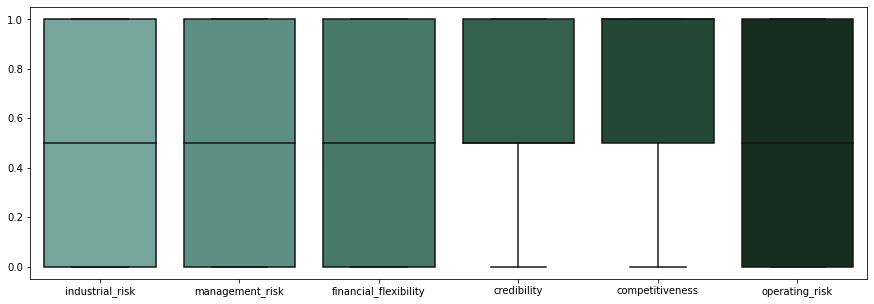

In [169]:
plt.figure(figsize=(15,5))
sn.boxplot(data = bank_cleaned, palette=sn.color_palette("ch:2,r=.2,l=.6"))

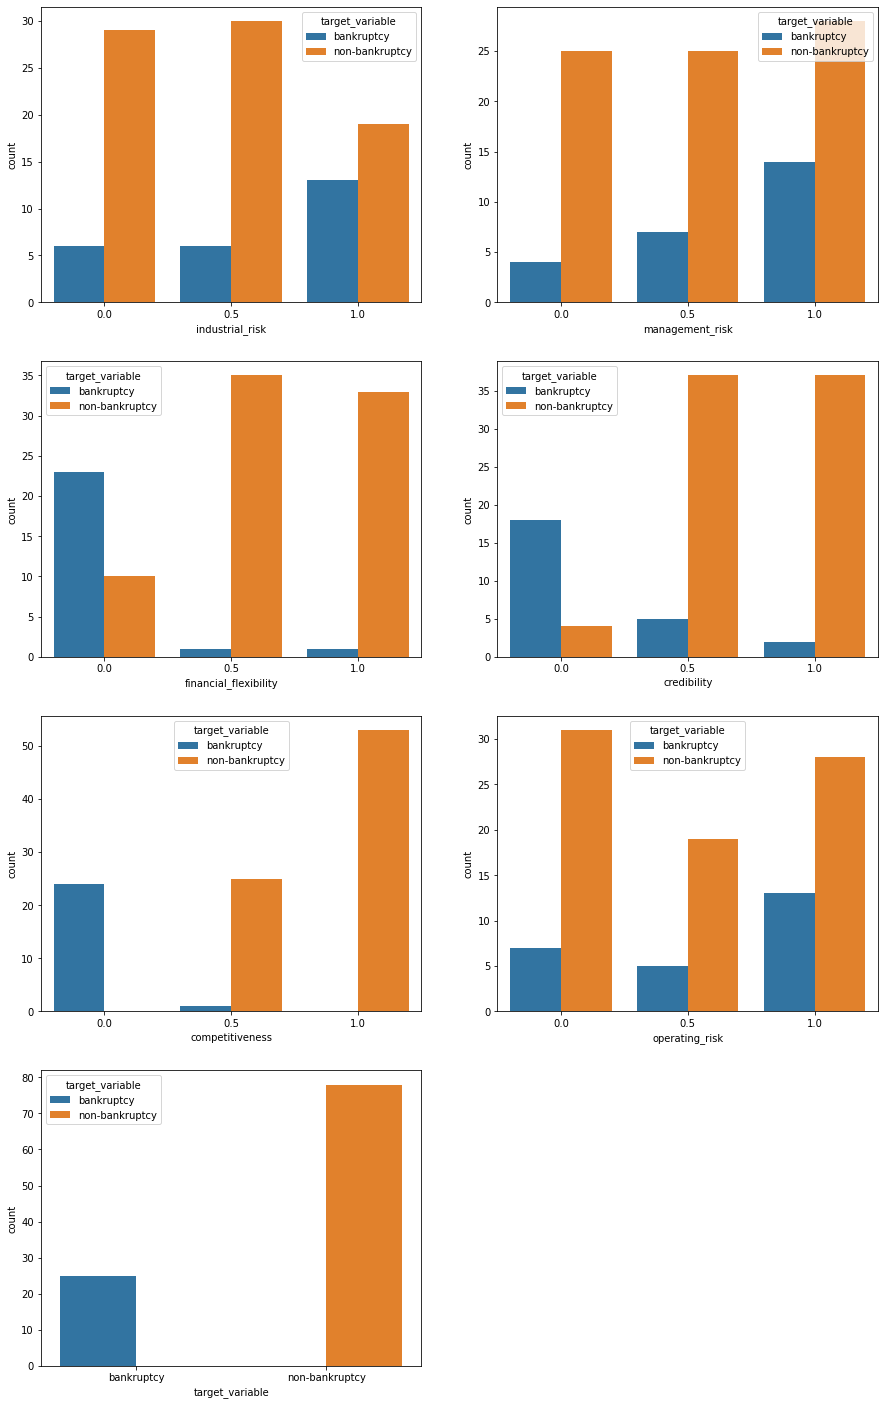

In [170]:
plt.subplots(3,2, figsize = (15,25))
i = 1
for feature in bank_cleaned.columns:
    plt.subplot(4,2,i)
    sn.countplot(data = bank_cleaned, x = feature, hue='target_variable',)
    i+=1 

> 🏹 **Note:** So we have unbalanced dataset.

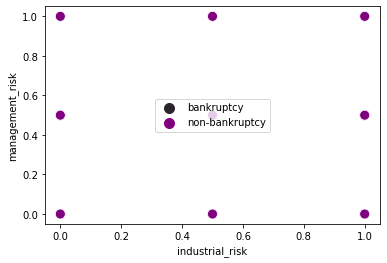

In [171]:
sn.scatterplot(data = bank_cleaned, x = 'industrial_risk', y = 'management_risk', hue = 'target_variable', 
               size= 'target_variable', sizes=[100,100], palette=sn.dark_palette('purple', n_colors=2))
plt.legend(loc = 'center')

<Figure size 1440x3600 with 0 Axes>

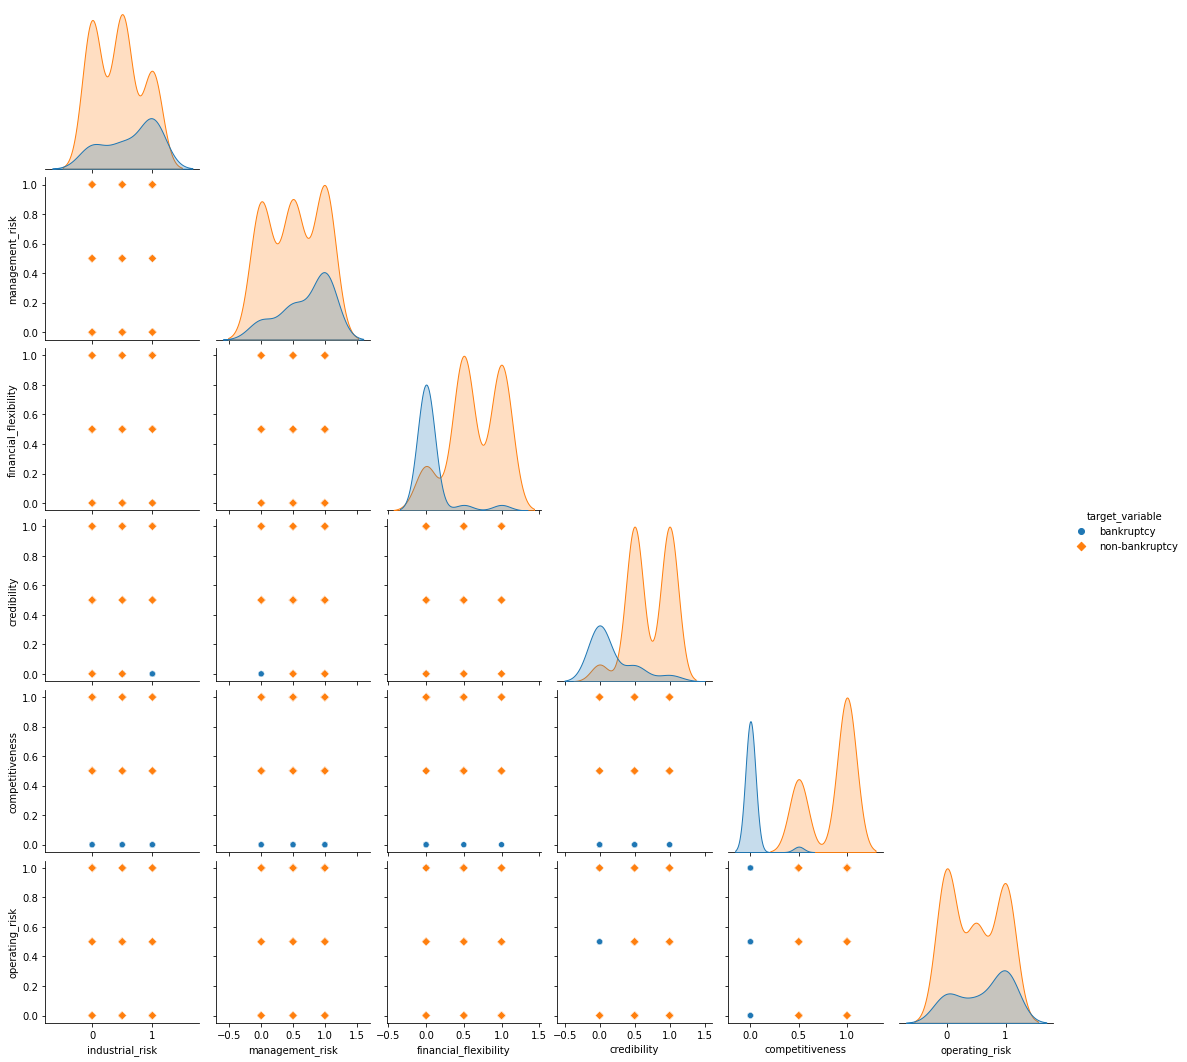

In [172]:
plt.figure(figsize=(20,50))
sn.pairplot(data = bank_cleaned, hue = 'target_variable', markers=['o', 'D'], corner=True)

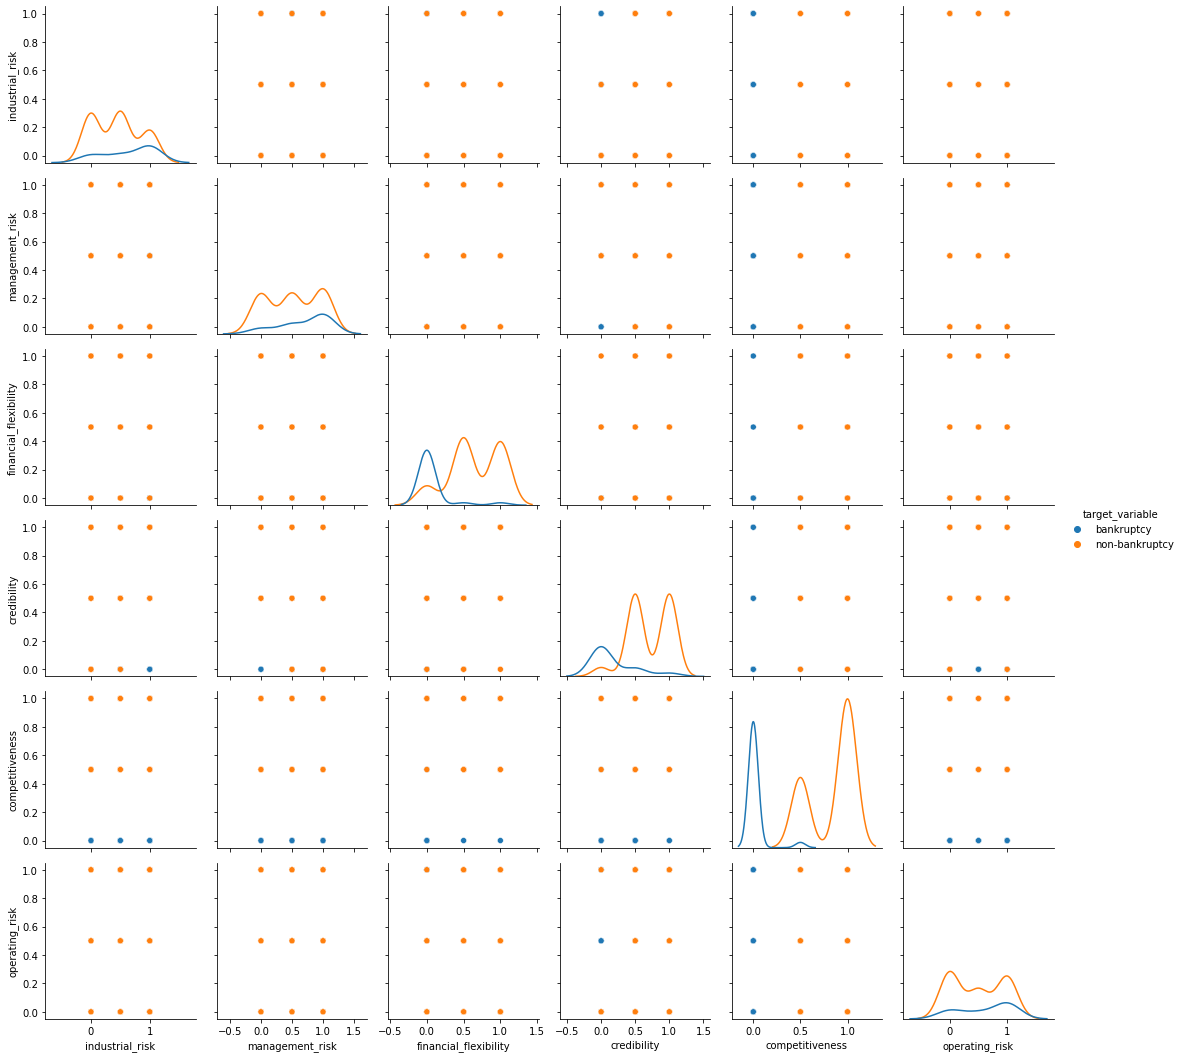

In [173]:
g = sn.PairGrid(data = bank_cleaned, hue='target_variable')
g.map_diag(sn.kdeplot)
g.map_offdiag(sn.scatterplot)
g.add_legend()

> **🏹 NOTE:** If we take a look at the competitiveness, when it is equal to 0 regardless of other features the company going to bankrupt and also 

> **Note that** the competitiveness means the ability of company to compete with other company. if it is zero, hence company can't compete with other so it will go bankrupt

**fun-fact 😂** if we just take the competitiveness, we can easily predict that the company will be bankrupt or not. we just don't need other variables. 😅

> **Let's take a look at it**

In [174]:
bank_cleaned[bank_cleaned.competitiveness == 0]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


> 🤣🤣🤣😂😂😂 **As expected** there is no need to create model now, right? 😂😁

In [175]:
bank_cleaned[bank_cleaned.target_variable == 'bankruptcy']

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


<AxesSubplot:>

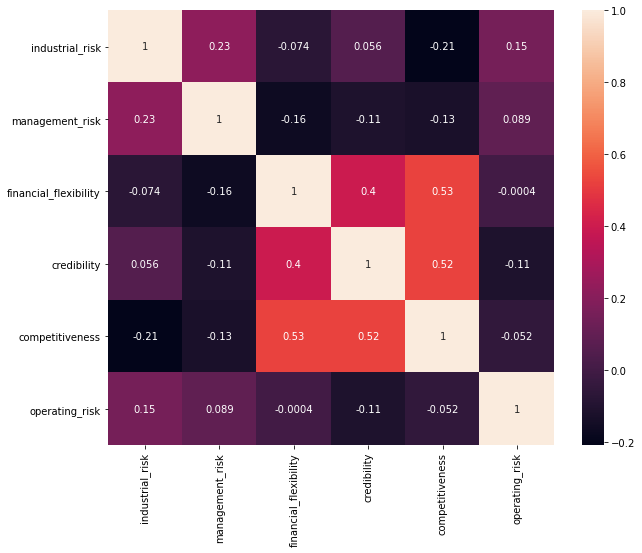

In [176]:
plt.figure(figsize=(10,8))
sn.heatmap(bank_cleaned.corr(), annot=True)

**Some key observation:**

1. We have categorical variables for features and target variable. so actually looking for outliers, correlation doesn't make any sense.
2. Distribution plot will show us the count of various feature variables.
3. The most important result came from the scatter plot or pairplot regarding **Competitiveness**.
4. There are lots of duplicate values.
5. Mathematically the **largest possible size of data will be 1458 unique rows**

### Encoding categorical variables

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
bank_cleaned['target_variable'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [179]:
def encode_manually(data):
    for feature in data.columns:
        if data[feature].dtype == object:
            print(f'Encoding {feature}:')
            variables = list(data[feature].unique())
            encode_number = range(len(variables))
            encodings_dict = dict(zip(variables, encode_number))
            print(encodings_dict)
            data[feature]=data[feature].map(encodings_dict)

In [180]:
encode_manually(bank_cleaned)

Encoding target_variable:
{'bankruptcy': 0, 'non-bankruptcy': 1}


In [181]:
bank_cleaned.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [182]:
bank_cleaned.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
98,0.0,0.5,0.0,0.5,1.0,0.5,1
99,0.0,0.5,0.5,0.5,1.0,0.5,1
100,0.0,0.5,0.5,0.0,1.0,0.0,1
101,0.5,1.0,0.0,0.0,1.0,0.0,1
102,0.0,1.0,0.5,0.0,0.5,0.0,1
